In [1]:
import matplotlib
from matplotlib import pyplot as plt
import scienceplots
## Nature用設定 ##
plt.style.use(['science','nature','sans','no-latex','std-colors'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (2,2)
# 軸
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['xtick.major.top'] = False
plt.rcParams['xtick.minor.top'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['ytick.major.right'] = False
plt.rcParams['ytick.minor.right'] = False
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
# 文字
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
plt.rcParams['legend.fontsize'] = 5
# その他
plt.rcParams['axes.grid'] = False


import numpy as np
import pandas as pd
import pickle

# from adjustText import adjust_text
import seaborn as sns

from tqdm import tqdm
from scipy import stats
from scipy.stats import spearmanr,ttest_1samp

import configparser
config = configparser.ConfigParser()
config.read('./config.ini', encoding='utf-8')
SAVE_DIR = config.get('settings','SAVE_DIR')
WORK_DIR = config.get('settings','WORK_DIR')
SHARE_DIR = config.get('settings','SHARE_DIR')

settings = configparser.ConfigParser()
settings.read('./settings.ini', encoding='utf-8')
MIN_YEAR = int(settings.get('experiment','MIN_YEAR'))
MAX_YEAR = int(settings.get('experiment','MAX_YEAR'))
RESOLUTION = float(settings.get('experiment','RESOLUTION'))
NMIN = int(settings.get('experiment','NMIN'))
RESOLUTION_TOPIC = float(settings.get('experiment','RESOLUTION_TOPIC'))
NMIN_TOPIC = int(settings.get('experiment','NMIN_TOPIC'))

# load

In [4]:
papers = pd.read_pickle('/disks/qnap2/data/t-miura/2023_readership/final_paper/papers_2016_all_validread.pickle')
for year in range(2016,2022):
    papers[f'c_history_sum_{year}'] = papers['c_history'].map(lambda l: sum(l[:year-2015]))

papers_hcp = papers[papers['label_hml_2021'].isin(['top'])].copy()
papers_mcp = papers[papers['label_hml_2021'].isin(['middle'])]
papers_lcp = papers[papers['label_hml_2021'].isin(['bottom'])]
papers_slow = papers[(papers['label_hml_2018'].isin(['middle','bottom']))&(papers['label_hml_2021'].isin(['top']))]
papers_fast = papers[(papers['label_hml_2018'].isin(['top']))&(papers['label_hml_2021'].isin(['top']))]
papers_low = papers[(papers['label_hml_2018'].isin(['middle','bottom']))&(papers['label_hml_2021'].isin(['middle','bottom']))]

print('hcp', papers_hcp.shape)
print('mcp', papers_mcp.shape)
print('lcp', papers_lcp.shape)
print('slow', papers_slow.shape)
print('fast', papers_fast.shape)
print('low', papers_low.shape)
print('------')

# ジャーナルマッチのみで行う
papers_slow_lowmatched2018_journal = papers.loc[pd.read_pickle('/disks/qnap2/data/t-miura/2023_readership/final_paper/papers_slow_1e-06_lowmatched2018_journal.pickle').index]
papers_low_slowmatched2018_journal = papers.loc[pd.read_pickle('/disks/qnap2/data/t-miura/2023_readership/final_paper/papers_low_1e-06_slowmatched2018_journal.pickle').index]
papers_slow_fastmatched2021_journal = papers.loc[pd.read_pickle('/disks/qnap2/data/t-miura/2023_readership/final_paper/papers_slow_1e-06_fastmatched2021_journal.pickle').index]
papers_fast_slowmatched2021_journal = papers.loc[pd.read_pickle('/disks/qnap2/data/t-miura/2023_readership/final_paper/papers_fast_1e-06_slowmatched2021_journal.pickle').index]

_ = pd.read_excel(
     SAVE_DIR+f'paper_detail/keywords_in_2021_{RESOLUTION}_{NMIN}_tficf_waltman_name.xlsx', 
     sheet_name='names'
 )[['partition','n_1970-2021','n_2016','nameByGPT-4'] + [f'word{i}' for i in range(5)]]
keywords = {int(k):v for k,v in _.set_index('partition')['nameByGPT-4'].to_dict().items()}
print(keywords)

## 各トピックのTF-IDFが最も高い単語
topic_keywords = {k: [v[0],v[1],v[2]]
    for k,v in pd.read_pickle(SAVE_DIR+f'paper_detail/keywords_in_2021_{RESOLUTION_TOPIC}_{NMIN_TOPIC}_tficf_waltman.pickle').items()
}

hcp (248831, 39)
mcp (1057318, 39)
lcp (981937, 39)
slow (54246, 39)
fast (194585, 39)
low (1997210, 39)
------
{-1: nan, 0: 'Molecular & Cellular Biology', 1: 'Neuropsychiatric Disorders', 2: 'Organic & Inorganic Chemistry', 3: 'Social & Political Sciences', 4: 'Ecology & Evolution', 5: 'Nutrition & Microbiome', 6: 'Nanomaterials & Energy Storage', 7: 'Computer Vision & Security', 8: 'Cardiovascular Medicine', 9: 'Wireless Networks & Security', 10: 'Biomaterials & Orthopedics', 11: 'Fluid Mechanics & Heat Transfer', 12: 'Astronomy & Astrophysics', 13: 'Environmental Science & Technology', 14: 'Information & Computer Science', 15: 'Materials Science & Engineering', 16: 'Plant Science & Stress Responses', 17: 'Quantum Physics & Superconductivity', 18: 'Geology & Tectonics', 19: 'Climate Science & Remote Sensing', 20: 'Gastroenterology & Surgery', 21: 'Respiratory & Critical Care Medicine', 22: 'Power Systems & Smart Grids', 23: 'Structural Engineering & Materials', 24: 'Metamaterials & 

# AUC

0it [00:00, ?it/s]

300


1it [01:44, 104.82s/it]

AUC(citation=0): 0.658
719


2it [02:28, 68.94s/it] 

AUC(citation=1): 0.582
2813


3it [02:34, 39.95s/it]

AUC(citation=5): 0.666
4920


4it [02:34, 38.69s/it]

AUC(citation=10): 0.622


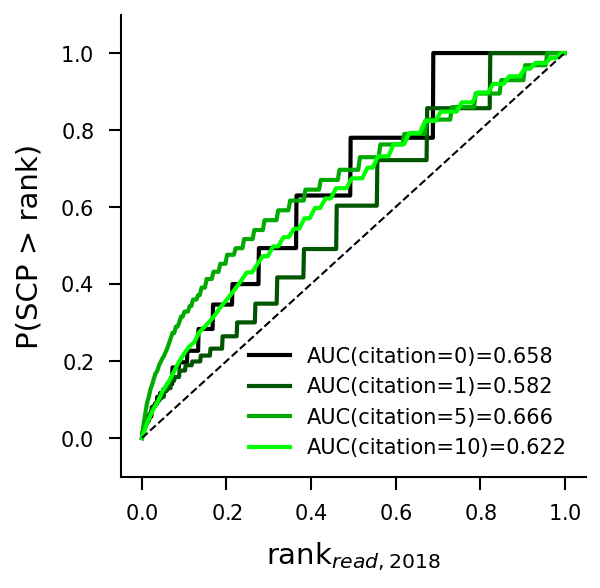

In [3]:
# 2018年の被引用数が0だったものの中で、readershipでソートした時のランキングと、sb数
fig,ax = plt.subplots(figsize=(2,2))
for color_i,citation in tqdm(enumerate([0,1,5,10])):
    df = (
        papers[(papers['c_history_sum_2018']==citation) & (papers['label_hml_2018'].isin(['middle','bottom']))]
        .assign(reader_2018_rank = lambda df: df['cumulative_reader_2018'].rank(ascending=False, method='min'))
    )
    
    tick = 500
    x = range(0,len(df),tick)
    
    n_slow = (df['label_hml_2021'] == 'top').sum() #被引用数がxの論文のうち、現在topになっているものの数
    print(n_slow)
    y = [sum(df[df['reader_2018_rank']<=i]['label_hml_2021']=='top')/n_slow for i in x]
    print(f'AUC(citation={citation}): {sum(y)/len(y):.3f}')
    ax.plot(np.array(list(x)+[len(df)])/len(df),y+[1], label=f'AUC(citation={citation})={sum(y)/len(y):.3f}',color=(0, color_i/3, 0))
    
ax.plot([0,1],[0,1],linestyle='--',color='black',linewidth=0.5)
    
ax.set_xlabel('rank$_{read,2018}$',fontsize=7)
ax.set_ylabel('P(SCP > rank)',fontsize=7)
ax.set_ylim(-0.1,1.1)
ax.legend()
plt.savefig('./scp_vs_lcp_auc_bycitation.eps')
plt.show()